<table style="width:100%;"/>
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;"/>
            <img src="Figures/Logo_Combined.png" width="350" alt="logo" align="left"/>
        </td/>
        <td style="width:20%; text-align:left; vertical-align: top;"/>
            Biochemical Engineering Lab<br/>
            & Janssen Cilag AG<br/>
        </td/>
    </tr/>
</table/>

<center> 
    <h1>Master Thesis on Protein Aggregation: nDSF Analysis </h1>
    <h3>by Eduard Meier</h3><br/>
</center>

In [1]:
# Import python libraries used in the following
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
import pathlib

#plt.rcParams['image.cmap']='magma'

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 12,
'font.serif': ['Computern Modern Roman'],
})

print('Current working directory: ')
os.getcwd()

Current working directory: 


'/Users/eduardmeier/Desktop/MasterThesis_DataAnalysis/03_JupyterNotebooks'

In [2]:
def scanFolders(paths):

    # Initialize folders list of same size as paths list
    folders = list(range(len(paths)))

    # Loop over all folder paths and extract folder names
    for i, path in enumerate(paths):
        folders[i] = pathlib.PurePath(path).name
        
    # Sort list of folders alphanumerically
    folders.sort()
    paths.sort()

    # Create dictionary (keys and corresponding values inserted later)
    csvFiles = {}

    # Create list of files (files inserted later)
    fileList = []

    # Loop over all paths and corresponding foldernames
    for path, folder in zip(paths, folders):
        # Empty file list at each new iteration
        fileList = []
    
        # Loop over all CSV-files in the corresponding CSV subfolder
        for file in glob.glob(os.path.join(path, '01_CSV', '*.csv')):
            fileList.append(file)
        
        # Sort current file list
        fileList = sorted(fileList)
        
        # Store the current file list under a key (= current foldername) in the dictionary "csvFiles"
        csvFiles[folder] = fileList
                        
    return [folders, csvFiles]

In [3]:
def extractData(folders, csvFiles):
    
    # Create dictionary for data of all CSV-files (correlation & intensity data)
    #corrData = {}
    #intData = {}

    ratioDataFrame = {}
    scatterDataFrame = {}
    
    allFiles = []

    # Loop over all folders
    for folder in folders:
        
        ratioFile = csvFiles[folder][4]
        scatterFile = csvFiles[folder][6]

        # Read CSV-file
        ratioDataFrame[folder] = pd.read_csv(ratioFile, sep='\t')
        scatterDataFrame[folder] = pd.read_csv(scatterFile, sep='\t')
            
    return [ratioDataFrame, scatterDataFrame]

In [4]:
# Set relative path to nDSF data folders
pathsSurf = glob.glob(os.path.join('..', '01_Data', '04_nDSF', '01_Surf', '*'))
pathsLowConc = glob.glob(os.path.join('..', '01_Data', '04_nDSF', '02_LowConc', '*'))
pathsHighConc = glob.glob(os.path.join('..', '01_Data', '04_nDSF', '03_HighConc', '*'))

In [5]:
[foldersSurf, csvFilesSurf] = scanFolders(pathsSurf)
[foldersLowConc, csvFilesLowConc] = scanFolders(pathsLowConc)
[foldersHighConc, csvFilesHighConc] = scanFolders(pathsHighConc)

In [6]:
[ratioSurf, scatterSurf] = extractData(foldersSurf, csvFilesSurf)
[ratioLowConc, scatterLowConc] = extractData(foldersLowConc, csvFilesLowConc)
[ratioHighConc, scatterHighConc] = extractData(foldersHighConc, csvFilesHighConc)

In [7]:
ratioSurf['JJ1_01mg_PO1_500ug_200rpm_10-00min_PM_No1_230524'].columns

Index(['T[°C]', 'Ratio 350nm / 330nm', 'S.D.', 'First derivative',
       'S.D. of first derivative'],
      dtype='object')

In [8]:
scatterSurf['JJ1_01mg_PO1_500ug_200rpm_10-00min_PM_No1_230524'].columns

Index(['T[°C]', 'Scattering [mAU]', 'S.D.', 'First derivative',
       'S.D. of first derivative'],
      dtype='object')

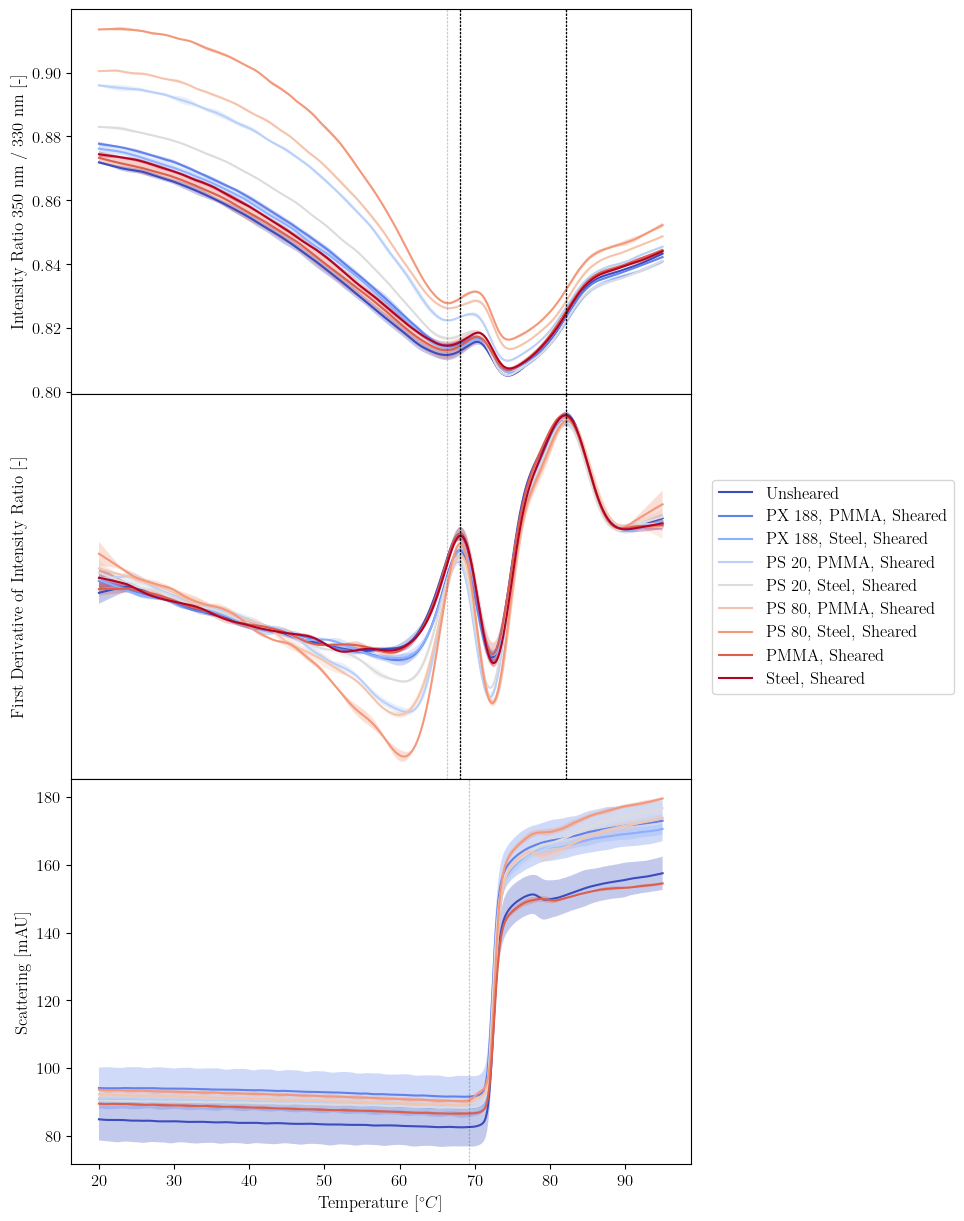

In [26]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(foldersSurf)+3)))

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,15), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0.5)

temp = ratioLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['T[°C]']
ratio = ratioLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['Ratio 350nm / 330nm']
stDev = ratioLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['S.D.']
deriv = ratioLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['First derivative']
stDer = ratioLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['S.D. of first derivative']
tempScat = scatterLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['T[°C]']
scat = scatterLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['Scattering [mAU]']
stScat = scatterLowConc['JJ1_01mg_000rpm_00-00min_NA_No1_230530']['S.D.']
    
axs[0].plot(temp, ratio)
axs[0].fill_between(temp, ratio-stDev, ratio+stDev, alpha=0.3, label='_nolegend_')
axs[1].plot(temp, deriv)
axs[1].fill_between(temp, deriv-stDer, deriv+stDer, alpha=0.3, label='_nolegend_')
axs[2].plot(tempScat, scat)
axs[2].fill_between(tempScat, scat-stScat, scat+stScat, alpha=0.3, label='_nolegend_')

for folder in foldersSurf:
 
    temp = ratioSurf[folder]['T[°C]']
    ratio = ratioSurf[folder]['Ratio 350nm / 330nm']
    stDev = ratioSurf[folder]['S.D.']
    deriv = ratioSurf[folder]['First derivative']
    stDer = ratioSurf[folder]['S.D. of first derivative']
    tempScat = scatterSurf[folder]['T[°C]']  
    scat = scatterSurf[folder]['Scattering [mAU]']
    stScat = scatterSurf[folder]['S.D.']
    
    axs[0].plot(temp, ratio)
    axs[0].fill_between(temp, ratio-stDev, ratio+stDev, alpha=0.3, label='_nolegend_')
    axs[1].plot(temp, deriv)
    axs[1].fill_between(temp, deriv-stDer, deriv+stDer, alpha=0.3, label='_nolegend_')
    axs[2].plot(tempScat, scat)
    axs[2].fill_between(tempScat, scat-stScat, scat+stScat, alpha=0.3, label='_nolegend_')

temp = ratioLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['T[°C]']
ratio = ratioLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['Ratio 350nm / 330nm']
stDev = ratioLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['S.D.']
deriv = ratioLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['First derivative']
stDer = ratioLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['S.D. of first derivative']
tempScat = scatterLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['T[°C]']
scat = scatterLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['Scattering [mAU]']
stScat = scatterLowConc['JJ1_01mg_200rpm_10-00min_PM_No1_230530']['S.D.']

axs[0].plot(temp, ratio)
axs[0].fill_between(temp, ratio-stDev, ratio+stDev, alpha=0.3, label='_nolegend_')
axs[1].plot(temp, deriv)
axs[1].fill_between(temp, deriv-stDer, deriv+stDer, alpha=0.3, label='_nolegend_')
axs[2].plot(tempScat, scat)
axs[2].fill_between(tempScat, scat-stScat, scat+stScat, alpha=0.3, label='_nolegend_')

temp = ratioLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['T[°C]']
ratio = ratioLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['Ratio 350nm / 330nm']
stDev = ratioLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['S.D.']
deriv = ratioLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['First derivative']
stDer = ratioLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['S.D. of first derivative']
tempScat = scatterLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['T[°C]']
scat = scatterLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['Scattering [mAU]']
stScat = scatterLowConc['JJ1_01mg_200rpm_10-00min_ST_No1_230530']['S.D.']

axs[0].plot(temp, ratio)
axs[0].fill_between(temp, ratio-stDev, ratio+stDev, alpha=0.3, label='_nolegend_')
axs[1].plot(temp, deriv)
axs[1].fill_between(temp, deriv-stDer, deriv+stDer, alpha=0.3, label='_nolegend_')

#temp = csvDataSurf['JJ1_01mg_PO1_500ug_200rpm_10-00min_PM_No1_230524']['T[°C]']
#ratio = csvDataSurf['JJ1_01mg_PO1_500ug_200rpm_10-00min_PM_No1_230524']['Ratio 350nm / 330nm']


#axs.set_title(r'Peak Area vs. Concentration')
axs[0].set_ylabel(r'Intensity Ratio 350 nm / 330 nm [-]')
axs[1].set_ylabel(r'First Derivative of Intensity Ratio [-]')
axs[2].set_ylabel(r'Scattering [mAU]')
axs[2].set_xlabel(r'Temperature [$^\circ C$]')

axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].yaxis.set_label_coords(-0.07,0.5)


axs[0].legend(['Unsheared', 'PX 188, PMMA, Sheared', 'PX 188, Steel, Sheared', 'PS 20, PMMA, Sheared', 
            'PS 20, Steel, Sheared', 'PS 80, PMMA, Sheared', 'PS 80, Steel, Sheared', 'PMMA, Sheared', 
           'Steel, Sheared'], loc='center', bbox_to_anchor=(1.23, -0.5))
  

axs[0].axvline(66.25, color='black', linestyle=':', linewidth=1, alpha=0.2, dash_capstyle='round')
axs[0].axvline(68, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')
axs[0].axvline(82.1, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')

axs[1].axvline(66.25, color='black', linestyle=':', linewidth=1, alpha=0.2, dash_capstyle='round')
axs[1].axvline(68, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')
axs[1].axvline(82.1, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')

axs[2].axvline(69.25, color='black', linestyle=':', linewidth=1, alpha=0.2, dash_capstyle='round')
    
fileNamePdf = os.path.join('..', '02_Plots', '04_nDSF', '01_PDF', 'nDSF_JJ1_01mg.pdf')
fileNamePng = os.path.join('..', '02_Plots', '04_nDSF', '02_PNG', 'nDSF_JJ1_01mg.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

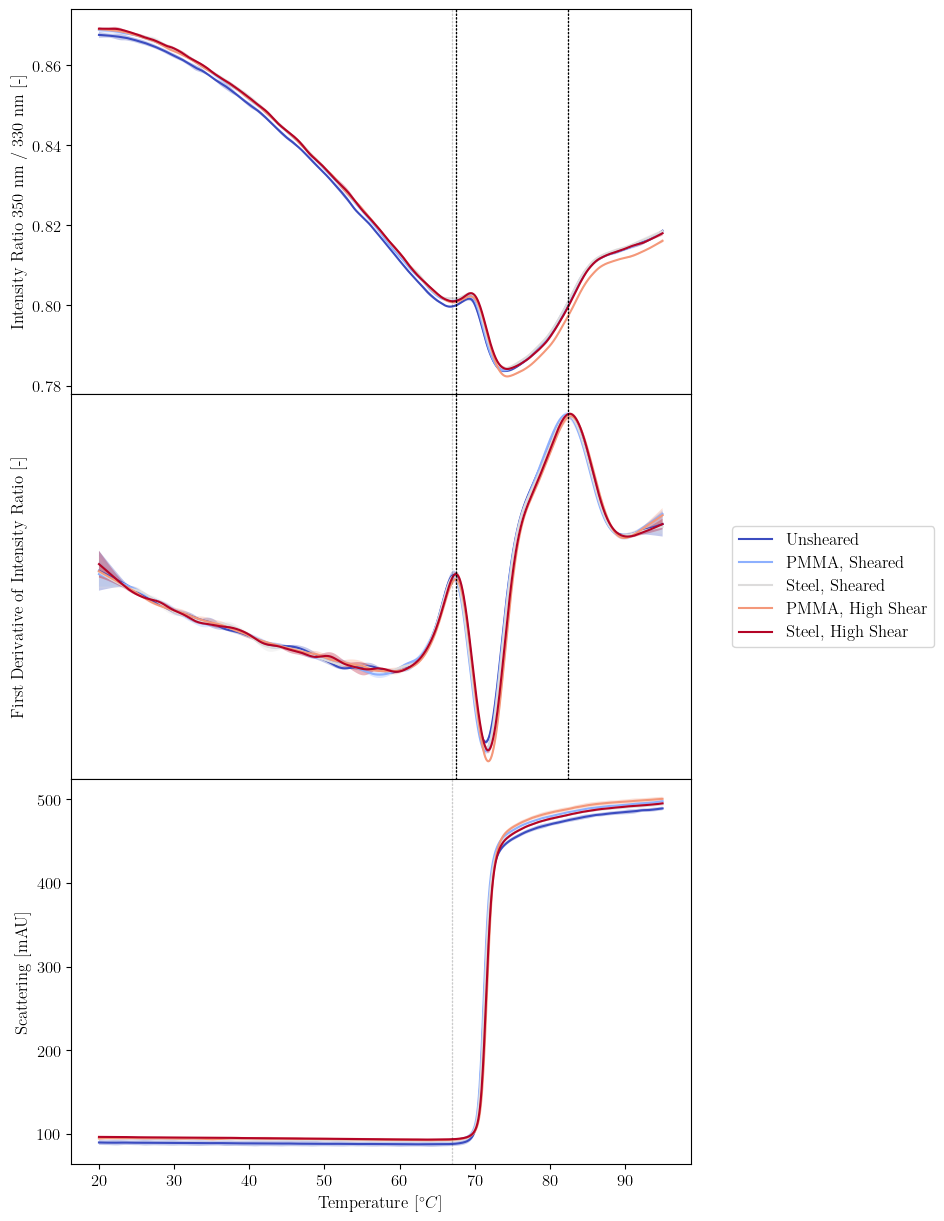

In [30]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(foldersHighConc))))

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,15), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0.5)

for folder in foldersHighConc:
 
    temp = ratioHighConc[folder]['T[°C]']
    ratio = ratioHighConc[folder]['Ratio 350nm / 330nm']
    stDev = ratioHighConc[folder]['S.D.']
    deriv = ratioHighConc[folder]['First derivative']
    stDer = ratioHighConc[folder]['S.D. of first derivative']
    tempScat = scatterHighConc[folder]['T[°C]']  
    scat = scatterHighConc[folder]['Scattering [mAU]']
    stScat = scatterHighConc[folder]['S.D.']
    
    axs[0].plot(temp, ratio)
    axs[0].fill_between(temp, ratio-stDev, ratio+stDev, alpha=0.3, label='_nolegend_')
    axs[1].plot(temp, deriv)
    axs[1].fill_between(temp, deriv-stDer, deriv+stDer, alpha=0.3, label='_nolegend_')
    axs[2].plot(tempScat, scat)
    axs[2].fill_between(tempScat, scat-stScat, scat+stScat, alpha=0.3, label='_nolegend_')


#axs.set_title(r'Peak Area vs. Concentration')
axs[0].set_ylabel(r'Intensity Ratio 350 nm / 330 nm [-]')
axs[1].set_ylabel(r'First Derivative of Intensity Ratio [-]')
axs[2].set_ylabel(r'Scattering [mAU]')
axs[2].set_xlabel(r'Temperature [$^\circ C$]')

axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].yaxis.set_label_coords(-0.07,0.5)


axs[0].legend(['Unsheared', 'PMMA, Sheared', 'Steel, Sheared', 'PMMA, High Shear', 
            'Steel, High Shear'], loc='center', bbox_to_anchor=(1.23, -0.5))
    
axs[0].axvline(67, color='black', linestyle=':', linewidth=1, alpha=0.2, dash_capstyle='round')
axs[0].axvline(67.5, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')
axs[0].axvline(82.4, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')

axs[1].axvline(67, color='black', linestyle=':', linewidth=1, alpha=0.2, dash_capstyle='round')
axs[1].axvline(67.5, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')
axs[1].axvline(82.4, color='black', linestyle=':', linewidth=1, alpha=1, dash_capstyle='round')

axs[2].axvline(67, color='black', linestyle=':', linewidth=1, alpha=0.2, dash_capstyle='round')
    
fileNamePdf = os.path.join('..', '02_Plots', '04_nDSF', '01_PDF', 'nDSF_JJ1_10mg.pdf')
fileNamePng = os.path.join('..', '02_Plots', '04_nDSF', '02_PNG', 'nDSF_JJ1_10mg.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()